# Exercise Week 2

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
#skleran
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [45]:
fileName='train.csv'

In [46]:
X=pd.read_csv(fileName,index_col=0)
print(X.columns)
sv,pc,n,s,a,si,pa,t,f,c,e = X.columns
# Define Y
y=X[sv] #pd.series
# Define X
X=X.drop(columns=[sv])

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [47]:
#if col not exists returns input df
def oneHot(df,colName):
    if colName in df.columns:
        # dummy encoding ~ one-hot encoding
        df= pd.concat( [df,pd.get_dummies(df[colName])],axis=1 )
        del df[colName]
    return df

In [48]:
#if col not exists returns input df
def binning(df,colName,b):
    if colName in df.columns:
        #equal binning
        cat= pd.cut( X[colName],bins=b )
        del df[colName]
        df = pd.concat( [df,cat],axis=1 )         
    return df
    

In [49]:
#returns score of train and test data
def score(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)   
    m = LogisticRegression(random_state=10) 
    m.fit(X_train, y_train)    
    return ( m.score(X_train,y_train),m.score(X_test,y_test) )

In [50]:
#binning age 
X[a].fillna(X[a].median()  ,inplace=True)
#binning 
ageGrops = [0,5,18,30,40,100]
X=binning(X,a,ageGrops)
#print(X.head(10))


In [51]:
#creates tuple of all possible combination w/o repeated elements n!/((n!-k!)k!
#out of "n" input columns with variant k 
#
def combScore(X,colX ): 
    from itertools import combinations 
    dScore = dict()    
    for i in range(1,len(colX)+1):
        combX = combinations(colX, i) 
        for cX in combX:
            #print(cX)    
            XX=X[list(cX)]          
            for c in cX:
                # one hot encode
                XX=oneHot(XX,c)        
            dScore[cX] = score(XX,y)
    return dScore

In [52]:
#colX=[s,pc,a,e,si]

colX=[s,pc,a,e,si]
dR = combScore(X,colX)
df=pd.DataFrame(dR,index=['train','test'])
df.columns=[ ",".join(k) for k in dR.keys() ]


Max test score=0.8114 for (Sex,Pclass,Age,Embarked,SibSp)


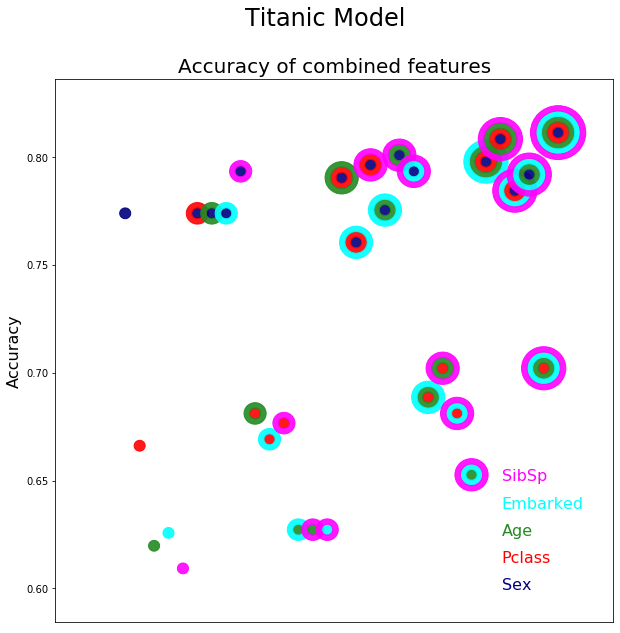

In [53]:
#max score
print( 'Max test score=%.4f for (%s)'%(df.loc['train'].max(), df.loc['train'].idxmax(axis=1)) )
#plot results
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10,10]
fig.suptitle('Titanic Model',fontsize=24)
dFeatCol = {s:'navy',pc:'red',a:'forestgreen',e:'cyan',si:'magenta'}
#range of accuracy
acc_min, acc_max = df.loc['train'].min() ,df.loc['train'].max()
rAcc=acc_max-acc_min
#radius
ra=.0025
#
count=0
for col in df.columns:    
    count+=1
    comb=col.split(',')
    #number of combination
    #nC = len(comb)
    k = float(df.loc[['train'],[col]].values)    
    for i, c in enumerate(comb):
        ax.add_artist(Wedge( ((count/len(df.columns))*rAcc+acc_min,k),ra*(i+1),0.,360, ra, color=dFeatCol[c],alpha=.9))
        
acc_min, acc_max = df.loc['train'].min() ,df.loc['train'].max()
ax.set_ylim(acc_min-.025, acc_max+.025)
ax.set_xlim(acc_min-.025, acc_max+.025)
#
ax.set_title('Accuracy of combined features',fontsize=20)
ax.set_ylabel('Accuracy',fontsize=16)
ax.set_xticks([])
#add legend
count=0
for k,v in dFeatCol.items():
    count+=1
    plt.text(.8,0.01 + 0.05*count ,k,color=v,fontsize=16,transform=ax.transAxes)